In [ ]:
# 1
a = [1, 2, 3, 4, 5]
b = list(reversed(a))
print(b)

[5, 4, 3, 2, 1]


In [ ]:
# 2
b = [elem for elem in a if elem % 2==0]
print(b)

[2, 4]


In [ ]:
# 3
b = [2 * elem for elem in a]
print(b)

[2, 4, 6, 8, 10]


In [ ]:
# 4
b = [elem * 4/3 for elem in a]
print(b)

[1.3333333333333333, 2.6666666666666665, 4.0, 5.333333333333333, 6.666666666666667]


In [69]:
# 4
st = 'abvgd'
print(max([ord(elem) for elem in st]))

118


In [ ]:
# 5
st_list = [(i, ord(st[i])) for i in range(len(st))]
print(st_list)

[(97, 0), (98, 1), (118, 2), (103, 3), (100, 4)]


In [ ]:
# 6
import numpy as np

arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(arr)
print(arr.sum(axis=0))
print(arr.sum(axis=1))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[12 15 18]
[ 6 15 24]


In [ ]:
# 7
import numpy as np

n = 10
k = 12
A = np.ones(n)
I = np.random.randint(0,n,k)
print(I)
A[I] += 1
print(A)
'''
np.add.at(A, I, 1)
print(A)
'''

[4 3 5 3 9 8 2 0 6 4 8 0]
[2. 1. 2. 2. 2. 2. 2. 1. 2. 2.]


In [65]:
# 8
import pandas as pd

df = pd.read_csv('Star3642_balanced.csv')
print(df.dtypes)

Vmag           float64
Plx            float64
e_Plx          float64
B-V            float64
SpType          object
Amag           float64
TargetClass      int64
dtype: object


In [ ]:
missing_values = df.isna().sum()

print(missing_values)

Vmag           0
Plx            0
e_Plx          0
B-V            0
SpType         0
Amag           0
TargetClass    0
dtype: int64


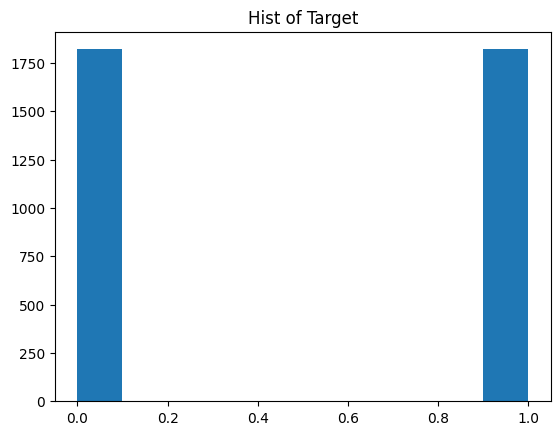

In [64]:
import matplotlib.pyplot as plt
plt.hist(df['TargetClass'])
plt.title(label = 'Hist of Target')
plt.show()

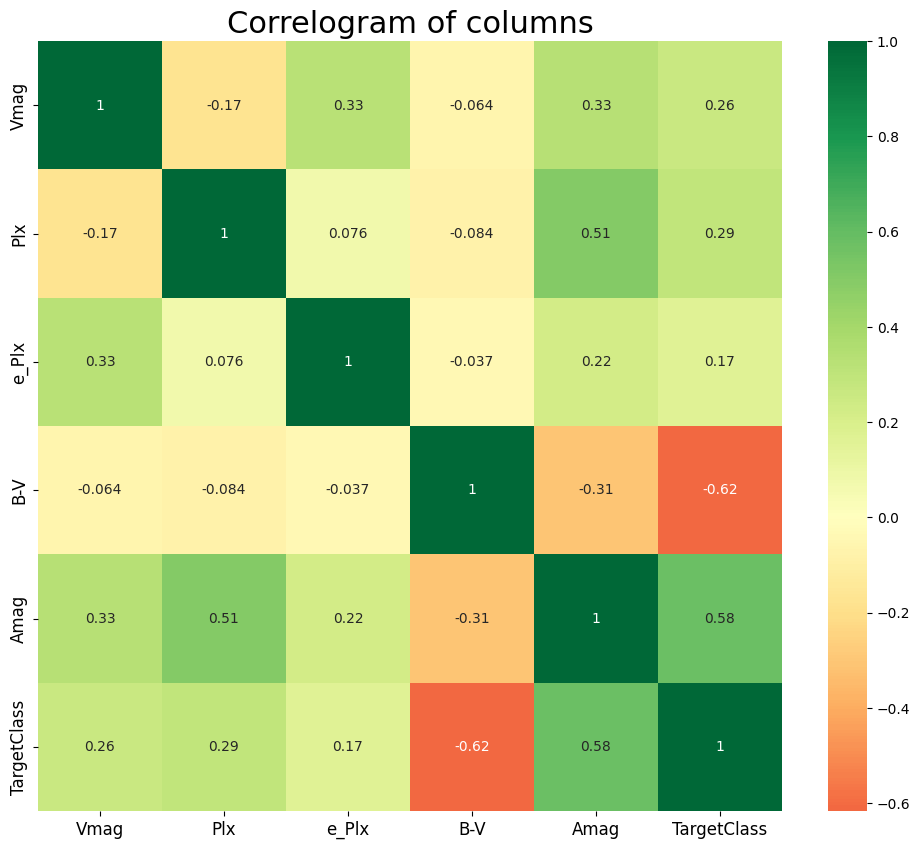

In [75]:
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only = True), xticklabels=df.corr(numeric_only = True).columns, yticklabels=df.corr(numeric_only = True).columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlogram of columns', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<Figure size 1000x800 with 0 Axes>

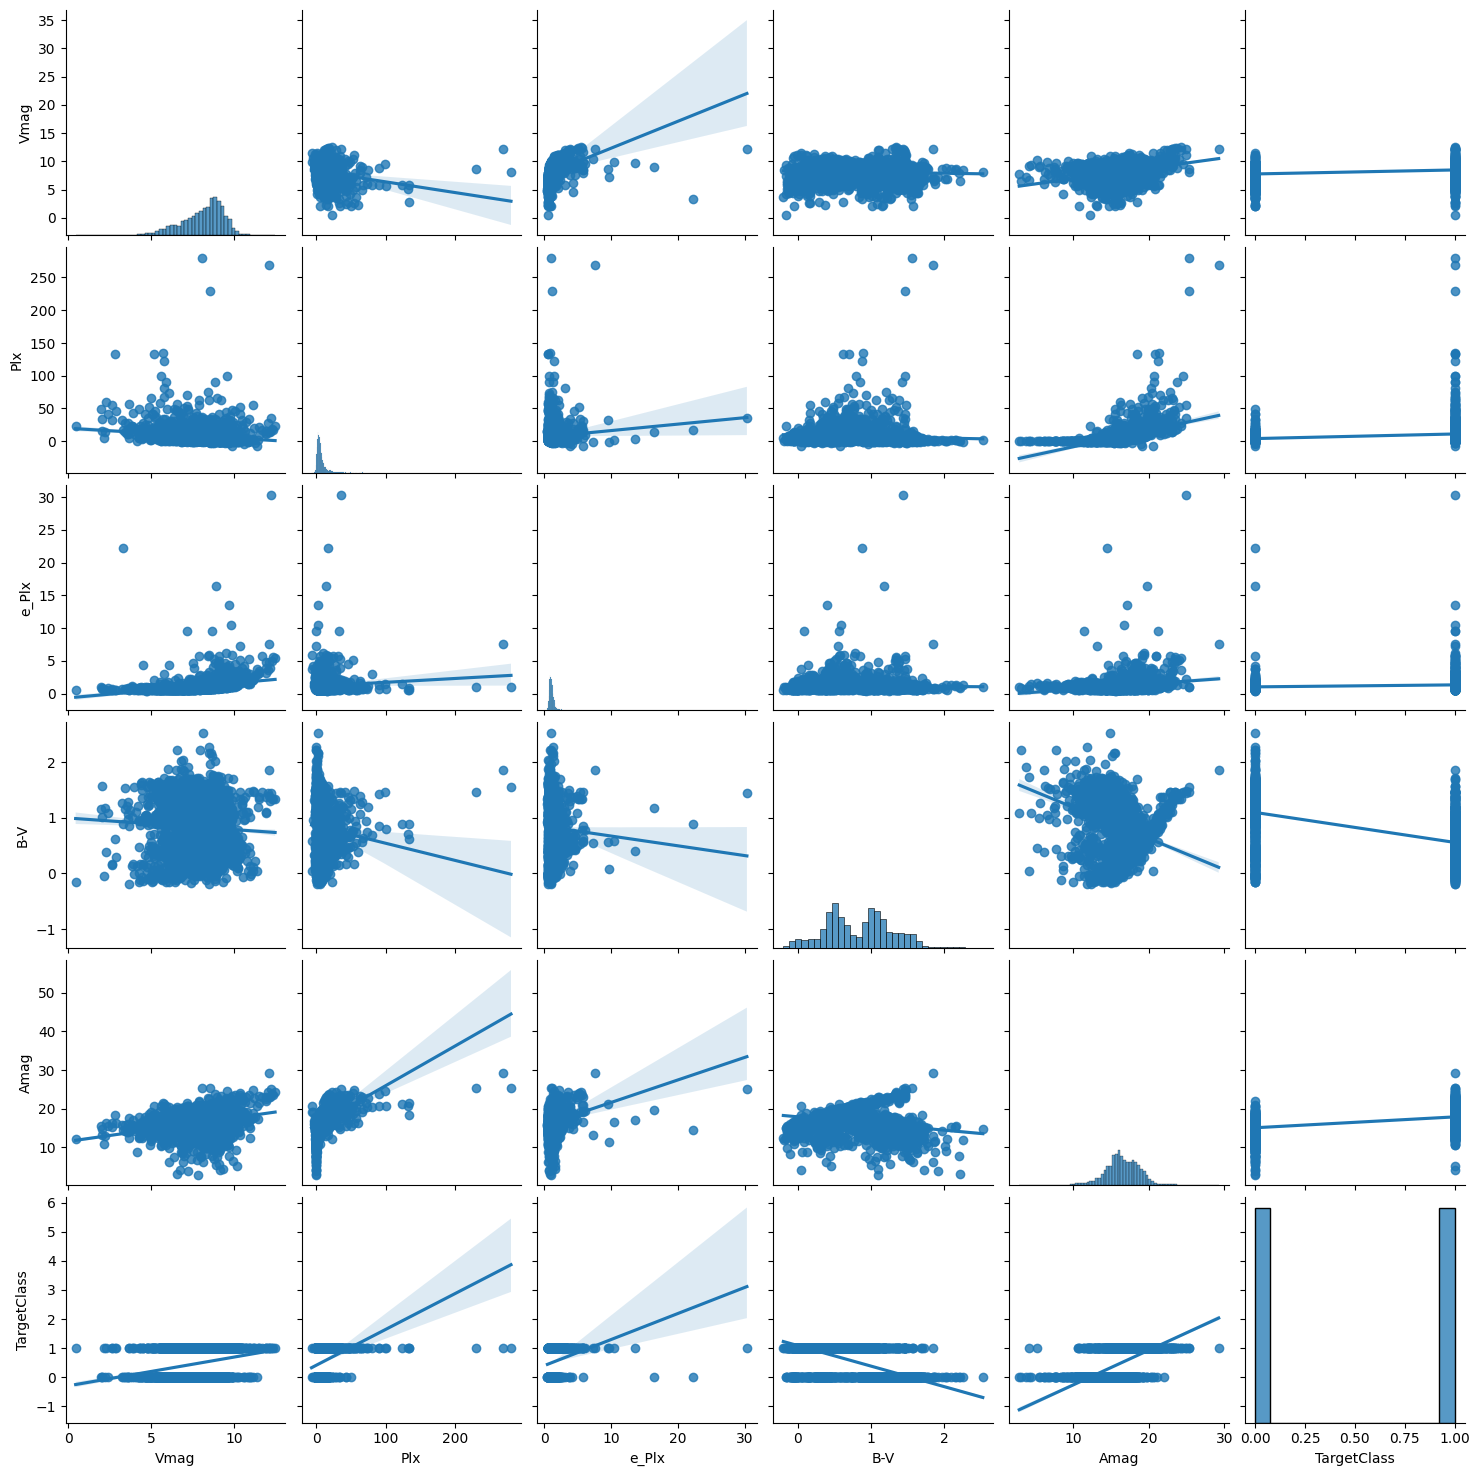

In [ ]:
plt.figure(figsize=(10,8))
sns.pairplot(df, kind="reg")
plt.show()

Выбросы Vmag: 
 21     4.83
128    4.34
172    3.99
208    0.45
210    2.40
Name: Vmag, dtype: float64
Выбросы Plx: 
 21     35.33
23     22.42
43     29.58
57    100.24
74     26.92
Name: Plx, dtype: float64
Выбросы e_Plx: 
 15     2.45
53     1.96
81     2.39
93     2.28
158    1.92
Name: e_Plx, dtype: float64
Выбросы B-V: 
 396     2.155
641     2.266
1164    2.157
1254    2.210
1333    2.215
Name: B-V, dtype: float64
Выбросы Amag: 
 33      9.539717
34     10.621097
47      9.335489
66      9.205907
157    10.646950
Name: Amag, dtype: float64
Выбросы TargetClass: 
 Series([], Name: TargetClass, dtype: int64)


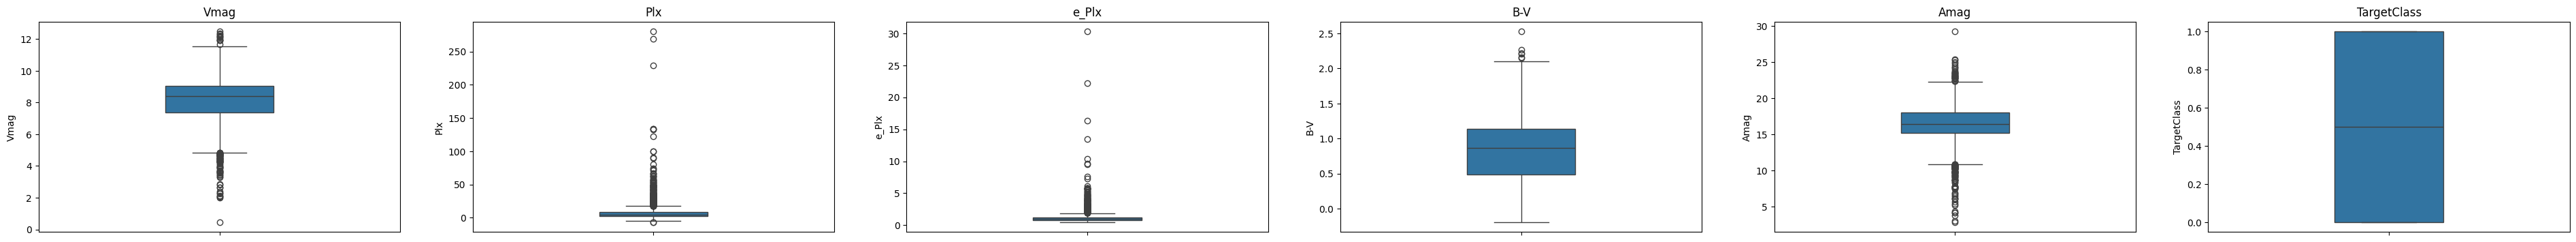

In [74]:
keys = ['Vmag', 'Plx','e_Plx','B-V', 'Amag', 'TargetClass']
fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 4)

for ax, key in zip(axes, keys):
  sns.boxplot(df[key], ax=ax, width=0.3)
  ax.set_title(key)
  Q1 =  df[key].quantile(0.25)
  Q3 = df[key].quantile(0.75)
  IQR = Q3 - Q1

  print(f'Выбросы {key}: \n {df[(df[key] < Q1-1.5*IQR ) | (df[key]> Q3+1.5*IQR)][key].head()}')

plt.show()

In [67]:
description = df.describe()
description = description.drop(index=['25%', '75%'])
print(description)

              Vmag          Plx        e_Plx          B-V         Amag  \
count  3642.000000  3642.000000  3642.000000  3642.000000  3642.000000   
mean      8.120530     7.606153     1.176568     0.827077    16.427388   
std       1.338875    11.924052     0.919999     0.436699     2.428144   
min       0.450000    -6.820000     0.470000    -0.196000     2.820000   
50%       8.390000     4.950000     1.040000     0.867000    16.392485   
max      12.490000   280.270000    30.290000     2.530000    29.249165   

       TargetClass  
count  3642.000000  
mean      0.500000  
std       0.500069  
min       0.000000  
50%       0.500000  
max       1.000000  


In [72]:
Sp_df = df.groupby('SpType').agg({'Plx': 'count'})
# pd.set_option('display.max_rows', None)
print(Sp_df)

              Plx
SpType           
A0/A1V          1
A0:Ia           1
A0II            1
A0III           3
A0IV            1
A0IV/V          1
A0Ia            1
A0Ia0           1
A0Ia:           2
A0Iab           2
A0Ib            2
A0V            17
A0Vn            2
A0Vnn           2
A0Vs            1
A1/A2IV         1
A1III           1
A1IV/V          1
A1Ia            2
A1Iab           1
A1V            16
A1Vn            3
A1Vs            1
A1Vvar          1
A2/A3IV         1
A2/A3V          2
A2III           4
A2IV            3
A2IV/V          1
A2V            16
A2Vnn           1
A2Vs            1
A3/A4III        1
A3II/III(m)     1
A3II/IIIp..     1
A3III           8
A3III/IV        1
A3IV            2
A3IV/V          1
A3V            18
A3Vn            1
A4III           3
A4IV            3
A4IV/V          1
A4V             4
A4Vm            1
A4Vs            1
A5III           4
A5III/IV        1
A5III/IVm..     1
A5IIIm...       1
A5IV            4
A5IV-V          1
A5V       